In [1]:
%matplotlib inline

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing

import datetime as dt
from PyAstronomy import pyasl

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### Create the sqlite connection, print the names of the tables in the .db file

In [3]:
conn = sqlite3.connect('../data/crime_census_weather_tod.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('all_crimes',), ('by_crime_type',)]


### Create a dataframe from the 'all_crimes' table

In [4]:
conn = sqlite3.connect('../data/crime_census_weather_tod.db')
df = pd.read_sql_query("SELECT * FROM all_crimes", conn)
conn.close()

In [5]:
df.head(5)

,level_0,BLOCK_GROUP,year,month,day,tod,crime_counts,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_bearing,wind_gust,wind_speed,index,TotalPop,TPopMargin,UnWgtSampleCtPop,PerCapitaIncome,PerCapIncMargin,MedianHouseholdInc,MedHouseholdIncMargin,MedianAge,MedianAgeMargin,HousingUnits,HousingUnitsMargin,UnweightedSampleHousingUnits,State,County,Tract,BlockGroup,census_year,crime_rate
0,0,000100 1,2009,1,10,Midnight,1,32.58,1.00,19.160000,0.570000,0.0,0.0,1024.950000,32.58,0.0,6.32,80.000000,2.12,0.740000,00010012009,1297.0,347.0,65.0,93642.0,28468,79118.0,44433,43.6,5.4,764.0,121.0,44.0,11.0,1.0,000100,1,2009,77.101002
1,1,000100 1,2009,1,16,Mid Afternoon,1,7.21,0.06,-7.120000,0.330000,0.0,0.0,1036.650000,16.75,2.0,4.18,302.000000,15.24,6.890000,00010012009,1297.0,347.0,65.0,93642.0,28468,79118.0,44433,43.6,5.4,764.0,121.0,44.0,11.0,1.0,000100,1,2009,77.101002
2,2,000100 1,2009,1,31,Afternoon,1,19.62,0.00,4.980000,0.400000,0.0,0.0,1021.060000,26.05,3.0,5.19,310.000000,12.60,5.480000,00010012009,1297.0,347.0,65.0,93642.0,28468,79118.0,44433,43.6,5.4,764.0,121.0,44.0,11.0,1.0,000100,1,2009,77.101002
3,3,000100 1,2009,2,6,Evening,1,36.77,0.03,14.130000,0.390000,0.0,0.0,1028.140000,36.77,0.0,4.96,128.000000,1.52,0.640000,00010012009,1297.0,347.0,65.0,93642.0,28468,79118.0,44433,43.6,5.4,764.0,121.0,44.0,11.0,1.0,000100,1,2009,77.101002
4,4,000100 1,2009,6,25,Evening,3,87.71,0.08,62.456667,0.443333,0.0,0.0,1008.306667,87.05,1.0,5.43,235.666667,2.76,0.913333,00010012009,1297.0,347.0,65.0,93642.0,28468,79118.0,44433,43.6,5.4,764.0,121.0,44.0,11.0,1.0,000100,1,2009,231.303007


In [6]:
df['crime_counts'].describe()

count    188224.000000
mean          1.050971
std           0.244793
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          12.000000
Name: crime_counts, dtype: float64

In [7]:
df.dtypes

level_0                           int64
BLOCK_GROUP                      object
year                              int64
month                             int64
day                               int64
tod                              object
crime_counts                      int64
apparent_temp                   float64
cloud_cover                     float64
dew_point                       float64
humidity                        float64
percip_intensity                float64
percip_probability              float64
pressure                        float64
temperature                     float64
uv_index                        float64
visibility                      float64
wind_bearing                    float64
wind_gust                       float64
wind_speed                      float64
index                            object
TotalPop                        float64
TPopMargin                      float64
UnWgtSampleCtPop                float64
PerCapitaIncome                 float64


In [49]:
df.isnull().sum(axis = 0)

BLOCK_GROUP               0
year                      0
month                     0
day                       0
tod                       0
crime_counts              0
apparent_temp             0
cloud_cover               0
dew_point                 0
humidity                  0
percip_intensity          0
percip_probability        0
pressure                  0
temperature               0
uv_index                  0
visibility                0
wind_speed                0
TotalPop                  0
PerCapitaIncome           0
MedianHouseholdInc        0
MedianAge                 0
HousingUnits              0
crime_rate                0
Weekday                   0
CrimeCategory             0
BlockGroup            68183
dtype: int64

### Dropping some columns we won't be using

In [9]:
df = df.drop(['level_0','wind_bearing', 'wind_gust'], axis=1)

In [10]:
df = df[df.year > 2012]

In [11]:
df['year'].unique()

array([2013, 2014, 2015, 2016, 2017])

In [13]:
df = df.reset_index(drop=True)

### Adding weekday (note, Monday=0)

In [14]:
for index, row in df.iterrows():
    date = dt.datetime(df['year'][index], df['month'][index], df['day'][index], 0, 0, 0)
    df.loc[index,'Weekday'] = date.weekday()

In [15]:
df.head(5)

,BLOCK_GROUP,year,month,day,tod,crime_counts,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_speed,index,TotalPop,TPopMargin,UnWgtSampleCtPop,PerCapitaIncome,PerCapIncMargin,MedianHouseholdInc,MedHouseholdIncMargin,MedianAge,MedianAgeMargin,HousingUnits,HousingUnitsMargin,UnweightedSampleHousingUnits,State,County,Tract,BlockGroup,census_year,crime_rate,Weekday
0,000100 1,2013,1,10,Early Morning,1,44.43,0.34,27.77,0.52,0.0000,0.00,1031.65,44.43,0.0,5.77,0.74,00010012013,1240.0,306.0,67.0,109147.0,30185,104083.0,29431,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,80.645161,3.0
1,000100 1,2013,1,30,Night,1,57.28,0.98,55.38,0.93,0.1323,0.99,996.10,57.28,0.0,3.57,1.33,00010012013,1240.0,306.0,67.0,109147.0,30185,104083.0,29431,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,80.645161,2.0
2,000100 1,2013,2,4,Evening,1,32.68,0.91,18.64,0.56,0.0000,0.00,1015.17,32.68,0.0,6.67,0.36,00010012013,1240.0,306.0,67.0,109147.0,30185,104083.0,29431,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,80.645161,0.0
3,000100 1,2013,2,14,Afternoon,1,43.85,0.00,28.66,0.55,0.0053,0.22,1016.32,43.85,4.0,6.54,2.49,00010012013,1240.0,306.0,67.0,109147.0,30185,104083.0,29431,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,80.645161,3.0
4,000100 1,2013,3,8,Mid Afternoon,1,44.84,0.72,27.55,0.44,0.0000,0.00,1020.88,48.26,1.0,6.40,7.55,00010012013,1240.0,306.0,67.0,109147.0,30185,104083.0,29431,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,80.645161,4.0


{'boxes': [<matplotlib.lines.Line2D at 0x13960ce48>],
 'caps': [<matplotlib.lines.Line2D at 0x1395dd160>,
 'fliers': [<matplotlib.lines.Line2D at 0x130ddc0f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1396d2400>],
 'whiskers': [<matplotlib.lines.Line2D at 0x13960cfd0>,
  <matplotlib.lines.Line2D at 0x1395f5978>]}

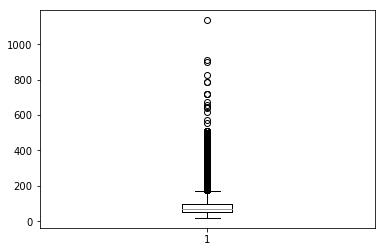

In [16]:
plt.boxplot(df.crime_rate)

(array([4.4590e+03, 1.8670e+04, 2.3202e+04, 2.6676e+04, 2.2429e+04,
        1.6742e+04, 1.1976e+04, 1.1841e+04, 8.9980e+03, 6.7010e+03,
        4.5960e+03, 3.2920e+03, 2.6500e+03, 1.7070e+03, 1.2250e+03,
        9.1300e+02, 6.4900e+02, 2.4200e+02, 2.6300e+02, 4.0700e+02,
        5.0000e+02, 2.0700e+02, 9.3000e+01, 1.8700e+02, 3.4000e+01,
        1.8100e+02, 9.3000e+01, 9.7000e+01, 1.2200e+02, 8.6000e+01,
        1.1900e+02, 2.6000e+01, 2.2000e+01, 8.5000e+01, 1.1000e+01,
        9.0000e+00, 8.0000e+00, 4.0000e+00, 9.2000e+01, 3.0000e+00,
        3.0000e+00, 5.0000e+00, 1.8000e+01, 7.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.00

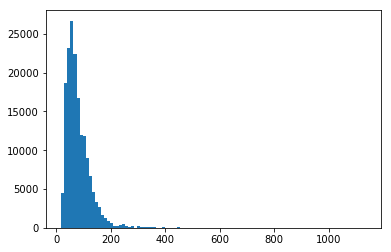

In [18]:
plt.hist(df.crime_rate, bins = 100)

### Creating categories for crime rate.  Zero being low, 3 being high

In [36]:
df.loc[df['crime_rate'] < 45, 'CrimeCategory'] = 0
df.loc[(df['crime_rate'] >= 45) & (df['crime_rate'] < 75), 'CrimeCategory'] = 1
df.loc[(df['crime_rate'] >= 75) & (df['crime_rate'] < 110), 'CrimeCategory'] = 2
df.loc[df['crime_rate'] >= 110, 'CrimeCategory'] = 3

In [37]:
df.head(5)

,BLOCK_GROUP,year,month,day,tod,crime_counts,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_speed,index,TotalPop,TPopMargin,UnWgtSampleCtPop,PerCapitaIncome,PerCapIncMargin,MedianHouseholdInc,MedHouseholdIncMargin,MedianAge,MedianAgeMargin,HousingUnits,HousingUnitsMargin,UnweightedSampleHousingUnits,State,County,Tract,BlockGroup,census_year,crime_rate,Weekday,FORCrimeCategory,LINECrimeCategory,CrimeCategory
0,000100 1,2013,1,10,Early Morning,1,44.43,0.34,27.77,0.52,0.0000,0.00,1031.65,44.43,0.0,5.77,0.74,00010012013,1240.0,306.0,67.0,109147.0,30185,104083.0,29431,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,80.645161,3.0,2.0,2.0,2.0
1,000100 1,2013,1,30,Night,1,57.28,0.98,55.38,0.93,0.1323,0.99,996.10,57.28,0.0,3.57,1.33,00010012013,1240.0,306.0,67.0,109147.0,30185,104083.0,29431,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,80.645161,2.0,2.0,2.0,2.0
2,000100 1,2013,2,4,Evening,1,32.68,0.91,18.64,0.56,0.0000,0.00,1015.17,32.68,0.0,6.67,0.36,00010012013,1240.0,306.0,67.0,109147.0,30185,104083.0,29431,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,80.645161,0.0,2.0,2.0,2.0
3,000100 1,2013,2,14,Afternoon,1,43.85,0.00,28.66,0.55,0.0053,0.22,1016.32,43.85,4.0,6.54,2.49,00010012013,1240.0,306.0,67.0,109147.0,30185,104083.0,29431,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,80.645161,3.0,2.0,2.0,2.0
4,000100 1,2013,3,8,Mid Afternoon,1,44.84,0.72,27.55,0.44,0.0000,0.00,1020.88,48.26,1.0,6.40,7.55,00010012013,1240.0,306.0,67.0,109147.0,30185,104083.0,29431,37.0,7.2,743.0,144.0,40.0,11.0,1.0,000100,1,2013,80.645161,4.0,2.0,2.0,2.0


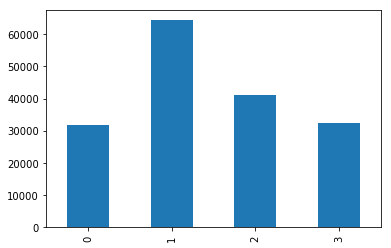

In [40]:
order = [0, 1, 2, 3]
df['CrimeCategory'].value_counts().loc[order].plot(kind='bar')

### Dropping more columns we won't be using

In [ ]:
df = df.drop(['index', 'TPopMargin', 'UnWgtSampleCtPop', 'PerCapIncMargin', 'MedHouseholdIncMargin', 'MedianAgeMargin', 'HousingUnitsMargin', 'UnweightedSampleHousingUnits', 'State', 'County', 'Tract', 'BlockGroup', 'census_year'], axis=1)

In [45]:
df.head()

,BLOCK_GROUP,year,month,day,tod,crime_counts,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_speed,TotalPop,PerCapitaIncome,MedianHouseholdInc,MedianAge,HousingUnits,crime_rate,Weekday,CrimeCategory
0,000100 1,2013,1,10,Early Morning,1,44.43,0.34,27.77,0.52,0.0000,0.00,1031.65,44.43,0.0,5.77,0.74,1240.0,109147.0,104083.0,37.0,743.0,80.645161,3.0,2.0
1,000100 1,2013,1,30,Night,1,57.28,0.98,55.38,0.93,0.1323,0.99,996.10,57.28,0.0,3.57,1.33,1240.0,109147.0,104083.0,37.0,743.0,80.645161,2.0,2.0
2,000100 1,2013,2,4,Evening,1,32.68,0.91,18.64,0.56,0.0000,0.00,1015.17,32.68,0.0,6.67,0.36,1240.0,109147.0,104083.0,37.0,743.0,80.645161,0.0,2.0
3,000100 1,2013,2,14,Afternoon,1,43.85,0.00,28.66,0.55,0.0053,0.22,1016.32,43.85,4.0,6.54,2.49,1240.0,109147.0,104083.0,37.0,743.0,80.645161,3.0,2.0
4,000100 1,2013,3,8,Mid Afternoon,1,44.84,0.72,27.55,0.44,0.0000,0.00,1020.88,48.26,1.0,6.40,7.55,1240.0,109147.0,104083.0,37.0,743.0,80.645161,4.0,2.0


### Need to get frequency of Block Groups, remove space between tract/blockgroup to work with the data

In [62]:
df['BLOCK_GROUP'] = df['BLOCK_GROUP'].str.replace(' ', '')

In [66]:
df.head()

,BLOCK_GROUP,year,month,day,tod,crime_counts,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_speed,TotalPop,PerCapitaIncome,MedianHouseholdInc,MedianAge,HousingUnits,crime_rate,Weekday,CrimeCategory
0,0001001,2013,1,10,Early Morning,1,44.43,0.34,27.77,0.52,0.0000,0.00,1031.65,44.43,0.0,5.77,0.74,1240.0,109147.0,104083.0,37.0,743.0,80.645161,3.0,2.0
1,0001001,2013,1,30,Night,1,57.28,0.98,55.38,0.93,0.1323,0.99,996.10,57.28,0.0,3.57,1.33,1240.0,109147.0,104083.0,37.0,743.0,80.645161,2.0,2.0
2,0001001,2013,2,4,Evening,1,32.68,0.91,18.64,0.56,0.0000,0.00,1015.17,32.68,0.0,6.67,0.36,1240.0,109147.0,104083.0,37.0,743.0,80.645161,0.0,2.0
3,0001001,2013,2,14,Afternoon,1,43.85,0.00,28.66,0.55,0.0053,0.22,1016.32,43.85,4.0,6.54,2.49,1240.0,109147.0,104083.0,37.0,743.0,80.645161,3.0,2.0
4,0001001,2013,3,8,Mid Afternoon,1,44.84,0.72,27.55,0.44,0.0000,0.00,1020.88,48.26,1.0,6.40,7.55,1240.0,109147.0,104083.0,37.0,743.0,80.645161,4.0,2.0


### Creating frequencies associated with Block Groups

In [69]:
df = df.reset_index(drop=True)

blockGroupDict = df['BLOCK_GROUP'].value_counts()
totalLen = len(df.index)

for index, row in df.iterrows():
    bg = df['BLOCK_GROUP'][index]
    
    count = blockGroupDict.get(bg, 'Did not find')
    
    df.loc[index,'BlockGroupFreq'] = count / totalLen * 100

In [71]:
df['BlockGroupFreq'].describe()

count    169667.000000
mean          0.440130
std           0.418613
min           0.000589
25%           0.184479
50%           0.295284
75%           0.544007
max           2.263846
Name: BlockGroupFreq, dtype: float64

### Catigorizing the block group frequencies

In [72]:
df.loc[df['BlockGroupFreq'] < .11, 'BlockGroupCategory'] = 0
df.loc[(df['BlockGroupFreq'] >= .11) & (df['BlockGroupFreq'] < .19), 'BlockGroupCategory'] = 1
df.loc[(df['BlockGroupFreq'] >= .19) & (df['BlockGroupFreq'] < .28), 'BlockGroupCategory'] = 2
df.loc[(df['BlockGroupFreq'] >= .28) & (df['BlockGroupFreq'] < .37), 'BlockGroupCategory'] = 3
df.loc[(df['BlockGroupFreq'] >= .37) & (df['BlockGroupFreq'] < .53), 'BlockGroupCategory'] = 4
df.loc[df['BlockGroupFreq'] >= .53, 'BlockGroupCategory'] = 5

In [74]:
df.tail()

,BLOCK_GROUP,year,month,day,tod,crime_counts,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_speed,TotalPop,PerCapitaIncome,MedianHouseholdInc,MedianAge,HousingUnits,crime_rate,Weekday,CrimeCategory,BlockGroupFreq,BlockGroupCategory
169662,0111003,2017,12,26,Morning,1,30.10,0.17,10.90,0.44,0.0,0.0,1032.99,30.10,1.0,8.14,1.55,1686.0,19928.0,32250.0,52.7,574.0,59.311981,1.0,1.0,0.599409,5.0
169663,0111003,2017,12,27,Late Night,1,30.36,1.00,16.24,0.55,0.0,0.0,1032.24,30.36,0.0,8.39,0.29,1686.0,19928.0,32250.0,52.7,574.0,59.311981,2.0,1.0,0.599409,5.0
169664,0111003,2017,12,28,Afternoon,1,22.36,0.07,1.11,0.39,0.0,0.0,1037.01,22.36,2.0,8.00,2.99,1686.0,19928.0,32250.0,52.7,574.0,59.311981,3.0,1.0,0.599409,5.0
169665,0111003,2017,12,29,Evening,1,23.54,0.06,9.63,0.55,0.0,0.0,1026.94,23.54,0.0,9.19,0.40,1686.0,19928.0,32250.0,52.7,574.0,59.311981,4.0,1.0,0.599409,5.0
169666,0111003,2017,12,31,Late Night,1,12.52,0.00,4.18,0.53,0.0,0.0,1025.53,18.31,0.0,8.18,3.82,1686.0,19928.0,32250.0,52.7,574.0,59.311981,6.0,1.0,0.599409,5.0


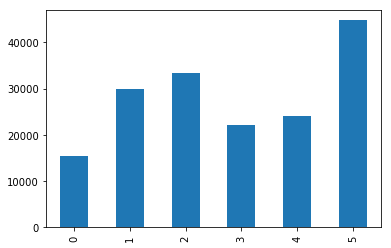

In [76]:
order = [0, 1, 2, 3, 4, 5]
df['BlockGroupCategory'].value_counts().loc[order].plot(kind='bar')

(array([  304.,   880.,  4101.,  5196.,  5567.,  9626.,  8400.,  7213.,
        11491., 10586.,  5983.,  8441.,  6812.,  5729.,  5034.,  3008.,
         6356.,  2027.,  7129.,  4477.,  2364.,  2474.,  1724.,  1814.,
         3759.,  1988.,  2037.,  2143.,  2223.,  2253.,  1167.,  2421.,
            0.,     0.,  2629.,  1374.,  1394.,     0.,  1479.,     0.,
            0.,     0.,     0.,     0.,     0.,  3495.,     0.,     0.,
            0.,  1904.,  1931.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,  4477.,     0.,     0.,     0.,  2416.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,  3841.]),
 array([5.89389805e-04, 2.32219583e-02, 4.58545268e-02, 6.84870953e-02,
        9.11196638e-02

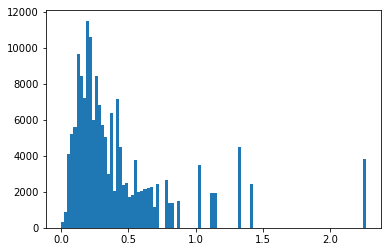

In [77]:
plt.hist(df.BlockGroupFreq, bins = 100)

In [78]:
df.head()

,BLOCK_GROUP,year,month,day,tod,crime_counts,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_speed,TotalPop,PerCapitaIncome,MedianHouseholdInc,MedianAge,HousingUnits,crime_rate,Weekday,CrimeCategory,BlockGroupFreq,BlockGroupCategory
0,0001001,2013,1,10,Early Morning,1,44.43,0.34,27.77,0.52,0.0000,0.00,1031.65,44.43,0.0,5.77,0.74,1240.0,109147.0,104083.0,37.0,743.0,80.645161,3.0,2.0,0.086051,0.0
1,0001001,2013,1,30,Night,1,57.28,0.98,55.38,0.93,0.1323,0.99,996.10,57.28,0.0,3.57,1.33,1240.0,109147.0,104083.0,37.0,743.0,80.645161,2.0,2.0,0.086051,0.0
2,0001001,2013,2,4,Evening,1,32.68,0.91,18.64,0.56,0.0000,0.00,1015.17,32.68,0.0,6.67,0.36,1240.0,109147.0,104083.0,37.0,743.0,80.645161,0.0,2.0,0.086051,0.0
3,0001001,2013,2,14,Afternoon,1,43.85,0.00,28.66,0.55,0.0053,0.22,1016.32,43.85,4.0,6.54,2.49,1240.0,109147.0,104083.0,37.0,743.0,80.645161,3.0,2.0,0.086051,0.0
4,0001001,2013,3,8,Mid Afternoon,1,44.84,0.72,27.55,0.44,0.0000,0.00,1020.88,48.26,1.0,6.40,7.55,1240.0,109147.0,104083.0,37.0,743.0,80.645161,4.0,2.0,0.086051,0.0


In [81]:
df.columns

Index(['BLOCK_GROUP', 'year', 'month', 'day', 'tod', 'crime_counts',
       'apparent_temp', 'cloud_cover', 'dew_point', 'humidity',
       'percip_intensity', 'percip_probability', 'pressure', 'temperature',
       'uv_index', 'visibility', 'wind_speed', 'TotalPop', 'PerCapitaIncome',
       'MedianHouseholdInc', 'MedianAge', 'HousingUnits', 'crime_rate',
       'Weekday', 'CrimeCategory', 'BlockGroupFreq', 'BlockGroupCategory'],
      dtype='object')

In [82]:
df.columns = ['BLOCK_GROUP', 'YEAR', 'MONTH', 'DAY', 'TOD', 'CRIME_COUNTS',
       'APPARENT_TEMP', 'CLOUD_COVER', 'DEW_POINT', 'HUMIDITY',
       'PRECIP_INTENSITY', 'PRECIP_PROB', 'PRESSURE', 'TEMPERATURE',
       'UV_INDEX', 'VISIBILITY', 'WIND_SPEED', 'TOTAL_POP', 'PERCAPTIA_INCOME',
       'MEDIAN_HOUSEHOLD_INC', 'MEDIAN_AGE', 'HOUSING_UNITS_NUM', 'CRIME_RATE',
       'WEEKDAY', 'CRIME_CATEGORY', 'BLOCKGROUP_FREQ', 'BLOCKGROUP_CATEGORY']

In [83]:
df.head()

,BLOCK_GROUP,YEAR,MONTH,DAY,TOD,CRIME_COUNTS,APPARENT_TEMP,CLOUD_COVER,DEW_POINT,HUMIDITY,PRECIP_INTENSITY,PRECIP_PROB,PRESSURE,TEMPERATURE,UV_INDEX,VISIBILITY,WIND_SPEED,TOTAL_POP,PERCAPTIA_INCOME,MEDIAN_HOUSEHOLD_INC,MEDIAN_AGE,HOUSING_UNITS_NUM,CRIME_RATE,WEEKDAY,CRIME_CATEGORY,BLOCKGROUP_FREQ,BLOCKGROUP_CATEGORY
0,0001001,2013,1,10,Early Morning,1,44.43,0.34,27.77,0.52,0.0000,0.00,1031.65,44.43,0.0,5.77,0.74,1240.0,109147.0,104083.0,37.0,743.0,80.645161,3.0,2.0,0.086051,0.0
1,0001001,2013,1,30,Night,1,57.28,0.98,55.38,0.93,0.1323,0.99,996.10,57.28,0.0,3.57,1.33,1240.0,109147.0,104083.0,37.0,743.0,80.645161,2.0,2.0,0.086051,0.0
2,0001001,2013,2,4,Evening,1,32.68,0.91,18.64,0.56,0.0000,0.00,1015.17,32.68,0.0,6.67,0.36,1240.0,109147.0,104083.0,37.0,743.0,80.645161,0.0,2.0,0.086051,0.0
3,0001001,2013,2,14,Afternoon,1,43.85,0.00,28.66,0.55,0.0053,0.22,1016.32,43.85,4.0,6.54,2.49,1240.0,109147.0,104083.0,37.0,743.0,80.645161,3.0,2.0,0.086051,0.0
4,0001001,2013,3,8,Mid Afternoon,1,44.84,0.72,27.55,0.44,0.0000,0.00,1020.88,48.26,1.0,6.40,7.55,1240.0,109147.0,104083.0,37.0,743.0,80.645161,4.0,2.0,0.086051,0.0


### Export to .csv

In [84]:
df.to_csv('../data/CrimeData.csv', sep=',', encoding='utf-8')